In [157]:
import pandas as pd

# Revisión del Dataset

In [158]:
# Leer el archivo csv
df_netflix = pd.read_csv('netflix_titles.csv')

In [159]:
# tipo de dato de cada columna
df_netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [160]:
# forma del dataframe -> cantidad de filas y columnas que tiene un dataframe
df_netflix.shape

(8807, 12)

# Identificación de data faltante

In [161]:
# numero de filas faltantes en cada columna -> suma de valores faltantes en cada columna
df_netflix.isnull().sum().sort_values(ascending=False)

# Con esto se puede ver bien como organizar la limpieza de datos
# En base a esto se puede decidir si las columnas con muchos datos faltantes es recomendable eliminarlas o imputar los valores faltantes.

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [162]:
# % de filas faltantes en cada columna

for column in df_netflix.columns:
    percentage = df_netflix[column].isnull().mean() * 100
    print(f"{column}: {percentage:.2f}%")

show_id: 0.00%
type: 0.00%
title: 0.00%
director: 29.91%
cast: 9.37%
country: 9.44%
date_added: 0.11%
release_year: 0.00%
rating: 0.05%
duration: 0.03%
listed_in: 0.00%
description: 0.00%


### Manejo de data faltante

In [163]:
# eliminar columna o fila con .drop, .dropna or .isnull

# eliminar columna
df_netflix.drop('director', axis=1) # axis=1 para indicar que es una columna

# eliminar fila
no_director = df_netflix[df_netflix['director'].isnull()].index # Da los indices de las filas que son nulas de la columna 'director'

df_netflix.drop(no_director, axis=0) # elimina la lista de indices obtenida arriba

# ~ + .isnull()
# otra forma de eliminar una fila -> usar solo el metodo isnull para obtener el mismo resultado
df_netflix[~(df_netflix['director'].isnull())] # se dice 'encuentra los valores no nulos dentro de la columna director' 

# dropna() -> permite eliminar valores nulos de una columna
df_netflix.dropna(subset=['director']).isnull().sum()

# es mejor analizar la cantidad de valores nulos antes de eliminarlos pero eliminar la columna entera no sería lo mejor, sino eliminar la fila con los valores nulos.


show_id           0
type              0
title             0
director          0
cast            473
country         422
date_added        0
release_year      0
rating            1
duration          3
listed_in         0
description       0
dtype: int64

In [164]:
df_netflix[df_netflix['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [165]:
# reemplazar por la media, mediana (data numérica) y moda (data categórica)
# se reemplazan los valores nulos por valores como media o mediana para que no quede null

df_netflix['rating'].mode() # moda de la columna rating
# df_netflix['rating'].mean() # media de la columna rating

# El valor no es una cadena de texto. Para reemplazar algo utilizando el metodo fillna(), se debe obtener una cadena de texto o numero
# Se transforma la serie a una cadena de texto
moda = ''.join(df_netflix['rating'].mode())
df_netflix['rating'].fillna(moda, inplace=True) # inplace=True para modificar el dataframe original


C:\Users\Guadalupe\AppData\Local\Temp\ipykernel_42316\2268961476.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_netflix['rating'].fillna(moda, inplace=True) # inplace=True para modificar el dataframe original


In [166]:
# reemplazar por numero arbitrario con . fillna()
df_netflix['duration'].fillna('0', inplace=True) # se reemplazan los valores nulos por 0 ya que no afectan a los valores de analisis, solo para darle un valor numerico

# backward , forward
# para reemplazar el valor nulo por el valor de la fila anterior o siguiente
# df_netflix.fillna(method='bfill') # reemplaza por el anterior
# df_netflix.fillna(method='ffill') # reemplaza por el siguiente

C:\Users\Guadalupe\AppData\Local\Temp\ipykernel_42316\4164730924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_netflix['duration'].fillna('0', inplace=True) # se reemplazan los valores nulos por 0 ya que no afectan a los valores de analisis, solo para darle un valor numerico


In [167]:
# extraer data de columna "duration" con metdos split() y extract()
df_movie = df_netflix[df_netflix['type']== 'Movie'] # arma una dataframe solo con peliculas

df_movie['minute']=df_movie['duration'].str.split(expand=True)[0].astype(int) # se obtiene por cada fila una lista
# expand=True crea una columna por cada elemento de la lista que se creo -> da como resultado un dataframe
# .astype(int) -> para asignar el tipo de dato entero


C:\Users\Guadalupe\AppData\Local\Temp\ipykernel_42316\2148452253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['minute']=df_movie['duration'].str.split(expand=True)[0].astype(int) # se obtiene por cada fila una lista


In [168]:
df_movie.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
minute           int64
dtype: object

In [169]:
# df_netflix['date_added'].str.split(pat='\d{4}', expand=True)[1] # pat=',' para dividir por la coma // # pat='\d{4}' para obtener solo el año

# Extraer datos de la columna "date_added"
df_netflix['date_added'].str.extract('(\d{4})')

# El metodo extract permite extraer ciertos textos de una data que esta en un dataframe
# El metodo split separa los textos basados en un patron o separador que especificamos
# en ambos casos se pueden utilizar expresiones regulares

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Guadalupe\AppData\Local\Temp\ipykernel_42316\1870948827.py:4: SyntaxWarning: invalid escape sequence '\d'
  df_netflix['date_added'].str.extract('(\d{4})')


,0
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
8802,2019
8803,2019
8804,2019
8805,2020


# Identificar valores atipicos

Son valores poco comunes que pueden estar a los dos extremos de una data, es decir pueden ser valores muy grandes o muy pequeños los cuales no se presentan muy comunmente en los datos.

## Usar histograma para identificar valores atipicos dentro de una data numerica

<Axes: ylabel='Frequency'>

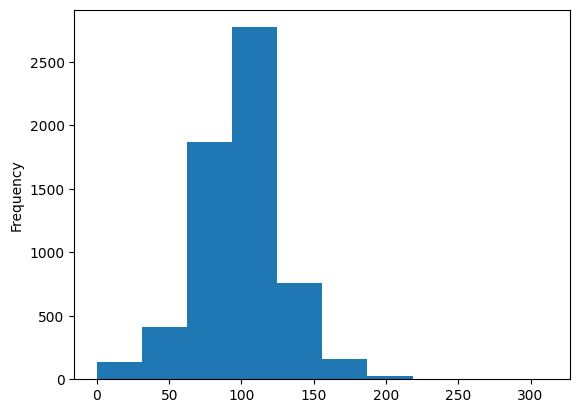

In [170]:
# hacer histograma
df_movie['minute'].plot(kind='hist', bins=10)

In [171]:
# obtener rangos de las barras con el metodo value_counts y el numero de bins
df_movie['minute'].value_counts(bins=10).sort_index()

(-0.313, 31.2]     135
(31.2, 62.4]       410
(62.4, 93.6]      1867
(93.6, 124.8]     2772
(124.8, 156.0]     766
(156.0, 187.2]     150
(187.2, 218.4]      22
(218.4, 249.6]       6
(249.6, 280.8]       2
(280.8, 312.0]       1
Name: count, dtype: int64

In [172]:
# manejo de valores atipicos
df_movie[~((df_movie['minute']>31.2) & (df_movie['minute']<218))]  # ~ para encontrar los valores atipicos

df_movie[((df_movie['minute']>31.2) & (df_movie['minute']<218))]  # da el rango de valores correctos

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


## Usar boxplot para identificar valores atipicos dentro de data numerica

<Axes: >

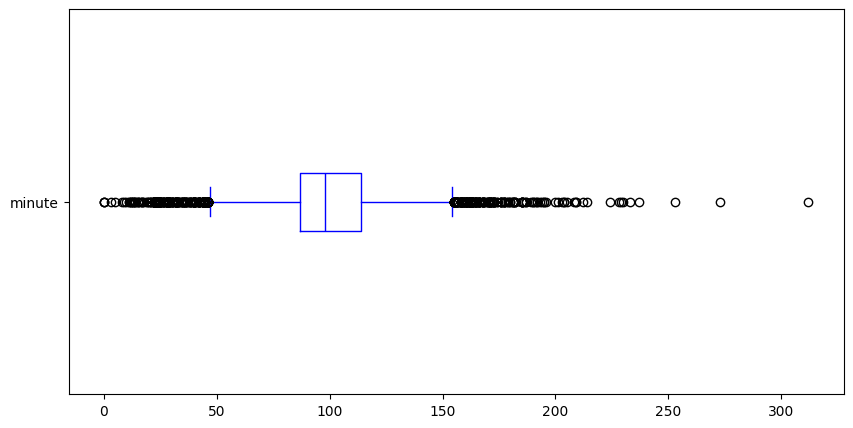

In [173]:
# hacer boxplot con pandas
df_movie['minute'].plot(kind='box', 
                        vert=False, 
                        color='blue', 
                        figsize=(10,5))

In [174]:
# revision a valores estadisticos
IQR=(114-87)    # IQR - Q3-Q1 -> Significa el valor de la caja. ayuda a calcular el valor minimo del boxplot
                # el valor minimo es el valorde la linea azul a la izquierda, todos los valores a la izquierda de esa linea son valores atipico
                # los valores atipicos maximos son los valores que estan a la derecha del valor de la linea azul de la derecha
min_boxplot= 87 - 1.5*IQR        # Q1 - 1.5*IQR -> valor de la linea de la izquierda
max_boxplot= 114 + 1.5*IQR       # Q3 + 1.5*IQR -> valor de la linea de la derecha

print(f"Valor minimo del boxplot: {min_boxplot}")
print(f"Valor maximo del boxplot: {max_boxplot}")
# df_movie['minute'].describe() # da los valores estadisticos de la columna minute

Valor minimo del boxplot: 46.5
Valor maximo del boxplot: 154.5


In [175]:
# manejar valores atipicos
df_movie[~((df_movie['minute']>min_boxplot) & (df_movie['minute']<max_boxplot))] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,45
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,191
8770,s8771,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,"March 1, 2018",2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies",Two young lovers set out to overcome the obsta...,171
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art...",157


## Usar grafico de barras para identificar valores atipicos dentro de data categorica

<Axes: xlabel='rating'>

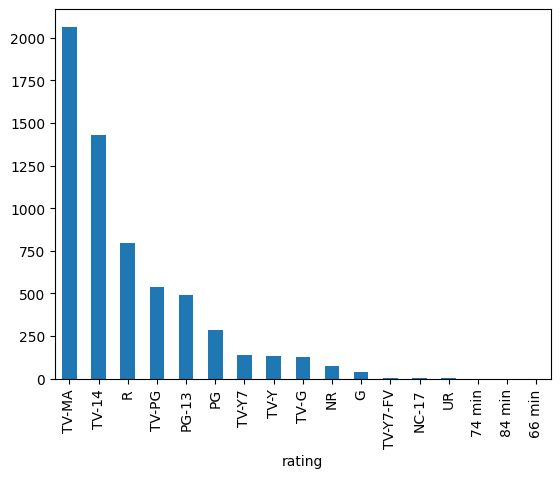

In [176]:
# hacer barplot con pandas
df_movie['rating'].value_counts().plot(kind='bar')

In [177]:
# eliminar las categorias atipicas
df_movie[~df_movie['rating'].isin(['TV-Y7-FV', 'UR', '74 min', '84 min', '66 min'])] # se eliminan las categorias atipicas de la columna rating

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


# Normalizacion de texto

## Manejar inconsistencia en mayusculas/minusculas: lower(), upper(), title()

In [178]:
# cambiar mayuscula/minuscula con el atributo str
# df_movie['title'].str.lower()
# df_movie['title'].str.upper()
df_movie['title'].str.title()

# lower() pone todo en minuscula
# upper() pone todo en mayuscula
# title() pone cada inicio de palabra con mayuscula

0                   Dick Johnson Is Dead
6       My Little Pony: A New Generation
7                                Sankofa
9                           The Starling
12                          Je Suis Karl
                      ...               
8801                             Zinzana
8802                              Zodiac
8804                          Zombieland
8805                                Zoom
8806                              Zubaan
Name: title, Length: 6131, dtype: object

In [179]:
# actualizar valores
df_movie['title'] = df_movie['title'].str.upper()

C:\Users\Guadalupe\AppData\Local\Temp\ipykernel_42316\1529973348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title'] = df_movie['title'].str.upper()


In [180]:
# cambiar mayuscula/minuscula con el metodo apply
df_movie['title'] = df_movie['title'].apply(lambda x: x.title()) # aplicar el metodo title a cada elemento

C:\Users\Guadalupe\AppData\Local\Temp\ipykernel_42316\4160887061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title'] = df_movie['title'].apply(lambda x: x.title()) # aplicar el metodo title a cada elemento


## Eliminar espacios en blanco con strip(), lstrip() y rstrip()

In [181]:
# como el metodo strip() funciona
movie_title = ' Titanic       '
print(movie_title)
# eliminar espacios delanteros con lstrip() -> l es de left por eso elimina los espacion de la izquierda
print(movie_title.lstrip())

# eliminar espacios finales con rstrip()
print(movie_title.rstrip())

# eliminar espacios delanteros y finales con strip()
movie_title = movie_title.strip()
print(movie_title)


 Titanic       
Titanic       
 Titanic
Titanic


In [182]:
# eliminar espacios delanteros y finales con el metodo strip()
df_movie['title'] = df_movie['title'].str.strip() # se eliminan los espacios delanteros y finales de cada elemento de la columna title

# eliminar espacios delanteros y finales con el metodo apply()
df_movie['title'] = df_movie['title'].apply(lambda x: x.strip())

C:\Users\Guadalupe\AppData\Local\Temp\ipykernel_42316\1271839075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title'] = df_movie['title'].str.strip() # se eliminan los espacios delanteros y finales de cada elemento de la columna title
C:\Users\Guadalupe\AppData\Local\Temp\ipykernel_42316\1271839075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title'] = df_movie['title'].apply(lambda x: x.strip())


## Remplazar cadenas de texto con replace() o sub()

Se reemplaza cierto texto con algun texto que se quiera/ necesite

In [183]:
# simbolos de expresiones regulares
# \w -> representa cualquier caracter alfanumerico (letras y numeros) a-z A-Z 0-9 _
# \s -> representa cualquier espacio en blanco (espacios, tabulaciones, saltos de linea)
# ^ -> indica el inicio de una cadena # negacion en expresiones regulares
# $ -> indica el final de una cadena

In [188]:
# eliminar signos de puntuacion con el metodo str.replace() y regex
df_movie['title'].str.replace('[^\w\s]', '', regex=True) 
# primer argumento la expresion regular que queremos reemplazar
# segundo argumento el valor con el que queremos reemplazar
# tercer argumento regex=True para indicar que estamos usando una expresion regular

# eliminar puntuacion con el metodo replace() y regex
df_movie['title'].str.replace('[^\w\s]', '', regex=True) 

# diferencia entre str.replace() y replace()
# str.replace() es un metodo de pandas que se aplica a series de texto -> es solo para cadenas de textos
# replace() es un metodo de string que se aplica a strings individuales -> puede reemplazar no solo cadenas de texto, sino tambien otro tipos de datos como numeros

# df_movie['title'].str.replace(1, 2, regex=True) 
df_movie['title'].replace(1, 2, regex=False)

# eliminar puntuacion con la funcion re.sub() con el metodo apply
import re
df_movie['title'].apply(lambda x:re.sub('[^\w\s]', '', x)) # se aplica la funcion re.sub a cada elemento de la columna title

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:19: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:19: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Guadalupe\AppData\Local\Temp\ipykernel_42316\3746133769.py:2: SyntaxWarning: invalid escape sequence '\w'
  df_movie['title'].str.replace('[^\w\s]', '', regex=True)
C:\Users\Guadalupe\AppData\Local\Temp\ipykernel_42316\3746133769.py:8: SyntaxWarning: invalid escape sequence '\w'
  df_movie['title'].str.replace('[^\w\s]', '', regex=True)
C:\Users\Guadalupe\AppData\Local\Temp\ipykernel_42316\3746133769.py:19: SyntaxWarning: invalid escape sequence '\w'
  df_movie['title'].apply(lambda x:re.sub('[^\w\s]', '', x)) # se aplica la funcion re.sub a cada elemento de la columna title


0                  Dick Johnson Is Dead
6       My Little Pony A New Generation
7                               Sankofa
9                          The Starling
12                         Je Suis Karl
                     ...               
8801                            Zinzana
8802                             Zodiac
8804                         Zombieland
8805                               Zoom
8806                             Zubaan
Name: title, Length: 6131, dtype: object